# Exploratory Data Analysis for Crimes in Chicago in 2018

In [1]:
import pandas as pd
import numpy as np
import boto3

In [11]:
data = pd.read_csv("../../Data/crimes_data.csv", index_col = "ID")

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [12]:
pd.set_option('display.max_columns', 30)

data.head()

Case Number                    Date                Block  IUCR  \
ID                                                                       
6360476    HP446021  07/10/2008 03:30:00 PM   062XX N PULASKI RD  1330   
6360477    HP447110  07/10/2008 09:30:00 PM    065XX W SCHOOL ST  1310   
6360479    HP447237  07/11/2008 10:46:00 PM    078XX S COLES AVE  1330   
6360480    HP447133  07/11/2008 11:00:00 PM      047XX W ERIE ST  0460   
6360481    HP447448  07/12/2008 02:12:00 AM  047XX S LOOMIS BLVD  2022   

              Primary Type    Description               Location Description  \
ID                                                                             
6360476  CRIMINAL TRESPASS        TO LAND                              OTHER   
6360477    CRIMINAL DAMAGE    TO PROPERTY                   RESIDENCE-GARAGE   
6360479  CRIMINAL TRESPASS        TO LAND  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   
6360480            BATTERY         SIMPLE            RESIDENCE PORCH/HALLWAY   
6360481          NARCOTICS  POSS: COCAINE                           SIDEWALK   

         Arrest  Domestic  Beat  District  Ward  Community Area FBI Code  \
ID                                                                         
6360476   False     False  1711      17.0  39.0            12.0       26   
6360477   False     False  1632      16.0  36.0            17.0       14   
6360479    True     False   421       4.0   7.0            43.0       26   
6360480   False     False  1111      11.0  28.0            25.0      08B   
6360481    True     False   933       9.0  20.0            61.0       18   

         X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
ID                                                                             
6360476     1148560.0     1941124.0  2008  02/28/2018 03:56:25 PM  41.994386   
6360477     1132019.0     1921224.0  2008  02/28/2018 03:56:25 PM  41.940082   
6360479     1197284.0     1853978.0  2008  02/28/2018 03:56:25 PM  41.754172   
6360480     1144594.0     1903891.0  2008  02/28/2018 03:56:25 PM  41.892291   
6360481     1167799.0     1873226.0  2008  02/28/2018 03:56:25 PM  41.807675   

         Longitude                       Location  
ID                                                 
6360476 -87.728891  (41.994385737, -87.728890617)  
6360477 -87.790201  (41.940082399, -87.790200793)  
6360479 -87.552581  (41.754172384, -87.552581097)  
6360480 -87.744420  (41.892290925, -87.744420446)  
6360481 -87.660081  (41.807674727, -87.660081178)

## Formatting date

In [13]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [14]:
data.head()

Case Number                Date                Block  IUCR  \
ID                                                                   
6360476    HP446021 2008-07-10 15:30:00   062XX N PULASKI RD  1330   
6360477    HP447110 2008-07-10 21:30:00    065XX W SCHOOL ST  1310   
6360479    HP447237 2008-07-11 22:46:00    078XX S COLES AVE  1330   
6360480    HP447133 2008-07-11 23:00:00      047XX W ERIE ST  0460   
6360481    HP447448 2008-07-12 02:12:00  047XX S LOOMIS BLVD  2022   

              Primary Type    Description               Location Description  \
ID                                                                             
6360476  CRIMINAL TRESPASS        TO LAND                              OTHER   
6360477    CRIMINAL DAMAGE    TO PROPERTY                   RESIDENCE-GARAGE   
6360479  CRIMINAL TRESPASS        TO LAND  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   
6360480            BATTERY         SIMPLE            RESIDENCE PORCH/HALLWAY   
6360481          NARCOTICS  POSS: COCAINE                           SIDEWALK   

         Arrest  Domestic  Beat  District  Ward  Community Area FBI Code  \
ID                                                                         
6360476   False     False  1711      17.0  39.0            12.0       26   
6360477   False     False  1632      16.0  36.0            17.0       14   
6360479    True     False   421       4.0   7.0            43.0       26   
6360480   False     False  1111      11.0  28.0            25.0      08B   
6360481    True     False   933       9.0  20.0            61.0       18   

         X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
ID                                                                             
6360476     1148560.0     1941124.0  2008  02/28/2018 03:56:25 PM  41.994386   
6360477     1132019.0     1921224.0  2008  02/28/2018 03:56:25 PM  41.940082   
6360479     1197284.0     1853978.0  2008  02/28/2018 03:56:25 PM  41.754172   
6360480     1144594.0     1903891.0  2008  02/28/2018 03:56:25 PM  41.892291   
6360481     1167799.0     1873226.0  2008  02/28/2018 03:56:25 PM  41.807675   

         Longitude                       Location  
ID                                                 
6360476 -87.728891  (41.994385737, -87.728890617)  
6360477 -87.790201  (41.940082399, -87.790200793)  
6360479 -87.552581  (41.754172384, -87.552581097)  
6360480 -87.744420  (41.892290925, -87.744420446)  
6360481 -87.660081  (41.807674727, -87.660081178)

In [15]:
data = data[data['Date'] >= '01/01/2017'].drop_duplicates()

In [16]:
data.shape

(577059, 21)

In [17]:
%matplotlib inline

data[data['Date'].dt.year == 2017]["Primary Type"].value_counts()[:10]

THEFT                  64343
BATTERY                49215
CRIMINAL DAMAGE        29041
ASSAULT                19301
DECEPTIVE PRACTICE     18996
OTHER OFFENSE          17225
BURGLARY               13001
ROBBERY                11877
NARCOTICS              11658
MOTOR VEHICLE THEFT    11407
Name: Primary Type, dtype: int64

In [18]:
data[data['Date'].dt.year == 2018]["Primary Type"].value_counts()[:10]

THEFT                  65051
BATTERY                49780
CRIMINAL DAMAGE        27801
ASSAULT                20376
DECEPTIVE PRACTICE     18627
OTHER OFFENSE          17109
NARCOTICS              12938
BURGLARY               11725
MOTOR VEHICLE THEFT     9990
ROBBERY                 9683
Name: Primary Type, dtype: int64

In [19]:
data['BlockID'] = data['Block'].map(lambda block: block.split()[0])

In [20]:
block_lat_map = data.groupby('Block')['Latitude'].mean().to_dict()
block_long_map = data.groupby('Block')['Longitude'].mean().to_dict()

In [21]:
data['Latitude'] = data[['Block', 'Latitude']].apply(lambda row: 
        block_lat_map[row[0]] if np.isnan(row[1]) 
        else row[1], axis=1)

In [22]:
data['Longitude'] = data[['Block', 'Longitude']].apply(lambda row: block_long_map[row[0]] if np.isnan(row[1]) else row[1], axis=1)

In [24]:
block_lat_map = data.groupby('BlockID')['Latitude'].mean().to_dict()
block_long_map = data.groupby('BlockID')['Longitude'].mean().to_dict()

In [25]:
data['Latitude'] = data[['BlockID', 'Latitude']].apply(lambda row: 
        block_lat_map[row[0]] if np.isnan(row[1]) 
        else row[1], axis=1)
data['Longitude'] = data[['BlockID', 'Longitude']].apply(lambda row: block_long_map[row[0]] if np.isnan(row[1]) else row[1], axis=1)

In [26]:
from sklearn.cluster import KMeans

latlong = data[['Latitude', 'Longitude']]

kmeans = KMeans(n_clusters=20, n_jobs=-1)
kmeans.fit(latlong)
data['cluster'] = kmeans.predict(latlong)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

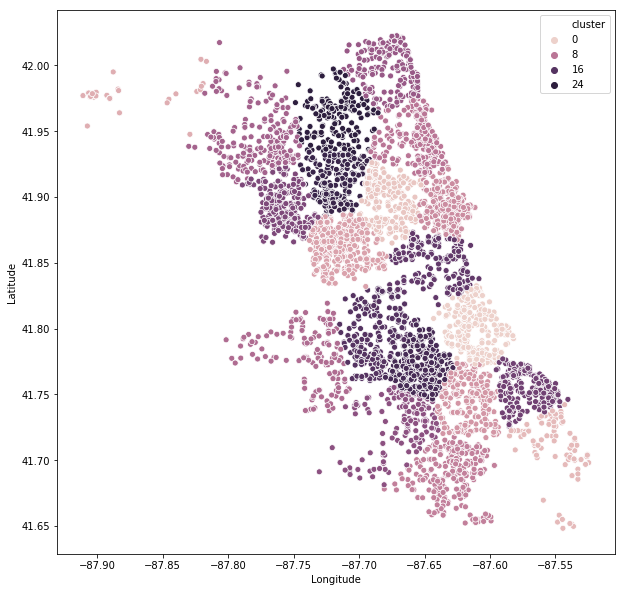

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x='Longitude', y='Latitude', hue='cluster', data=data.sample(5000))

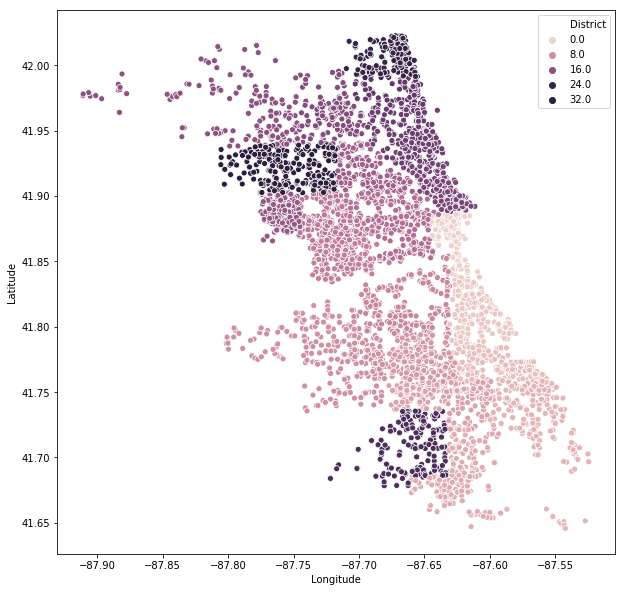

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x='Longitude', y='Latitude', hue='District', data=data.sample(5000))

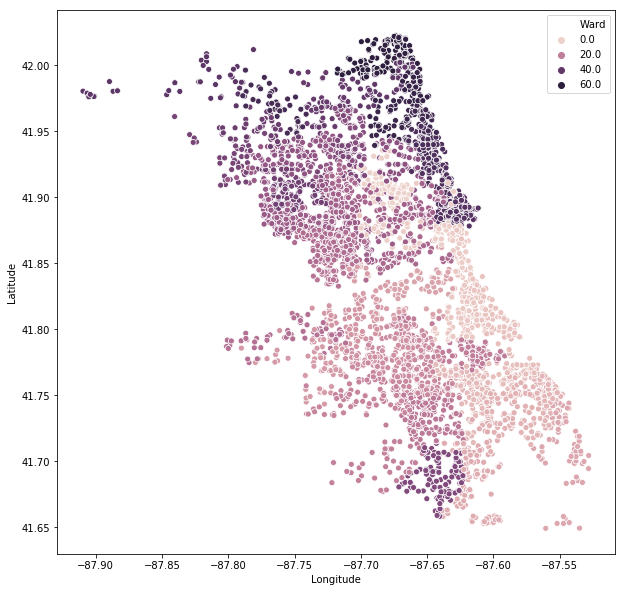

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x='Longitude', y='Latitude', hue='Ward', data=data.sample(5000))

In [91]:
data['hour'] = data['Date'].dt.hour

In [97]:
data.head(5)

Case Number                Date                                Block  \
ID                                                                              
11207956    JB120346 2018-01-18 09:35:00                076XX S VINCENNES AVE   
11072665    JA412761 2017-08-24 15:42:00                  037XX S INDIANA AVE   
11236141    JB159579 2018-02-21 00:15:00  044XX S DR MARTIN LUTHER KING JR DR   
11236178    JB159602 2018-02-21 00:40:00                   037XX W ADDISON ST   
11236182    JB159629 2018-02-21 02:40:00                  061XX S INDIANA AVE   

          IUCR                Primary Type                     Description  \
ID                                                                           
11207956  0486                     BATTERY         DOMESTIC BATTERY SIMPLE   
11072665  1750  OFFENSE INVOLVING CHILDREN                     CHILD ABUSE   
11236141  1310             CRIMINAL DAMAGE                     TO PROPERTY   
11236178  041A                     BATTERY             AGGRAVATED: HANDGUN   
11236182  0326                     ROBBERY  AGGRAVATED VEHICULAR HIJACKING   

         Location Description  Arrest  Domestic  Beat  District  Ward  \
ID                                                                      
11207956               STREET    True     False   623       6.0  17.0   
11072665      DAY CARE CENTER    True     False   212       2.0   3.0   
11236141            RESIDENCE   False     False   215       2.0   3.0   
11236178               STREET   False     False  1732      17.0  30.0   
11236182               STREET   False     False   311       3.0  20.0   

          Community Area FBI Code  X Coordinate  Y Coordinate  Year  \
ID                                                                    
11207956            69.0      08B     1175515.0     1854490.0  2018   
11072665            35.0       20     1178221.0     1880010.0  2017   
11236141            38.0       14     1179600.0     1875687.0  2018   
11236178            16.0      04B     1150919.0     1923677.0  2018   
11236182            40.0       03     1178648.0     1864489.0  2018   

                      Updated On   Latitude  Longitude  \
ID                                                       
11207956  05/04/2018 03:51:04 PM  41.756092 -87.632341   
11072665  11/07/2018 04:13:47 PM  41.826060 -87.621650   
11236141  05/04/2018 03:51:04 PM  41.814166 -87.616723   
11236178  05/04/2018 03:51:04 PM  41.946464 -87.720672   
11236182  05/04/2018 03:51:04 PM  41.783459 -87.620556   

                               Location BlockID  cluster  hour  
ID                                                              
11207956  (41.756091788, -87.632341337)   076XX        5     9  
11072665  (41.826060201, -87.621650289)   037XX       12    15  
11236141  (41.814166087, -87.616723368)   044XX       13     0  
11236178  (41.946464013, -87.720672053)   037XX        4     0  
11236182  (41.783459478, -87.620555964)   061XX       13     2

In [119]:
cols_to_drop = ['Case Number', 'IUCR', 'Description', 
                'Arrest', 'Domestic', 'FBI Code',
                'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Location']

In [120]:
data['BlockID'].unique().shape

(139,)

In [121]:
data['month'] = data['Date'].dt.month

In [126]:
data.drop(cols_to_drop, axis=1).head()

Date                                Block  \
ID                                                                  
11207956 2018-01-18 09:35:00                076XX S VINCENNES AVE   
11072665 2017-08-24 15:42:00                  037XX S INDIANA AVE   
11236141 2018-02-21 00:15:00  044XX S DR MARTIN LUTHER KING JR DR   
11236178 2018-02-21 00:40:00                   037XX W ADDISON ST   
11236182 2018-02-21 02:40:00                  061XX S INDIANA AVE   

                        Primary Type Location Description  Beat  District  \
ID                                                                          
11207956                     BATTERY               STREET   623       6.0   
11072665  OFFENSE INVOLVING CHILDREN      DAY CARE CENTER   212       2.0   
11236141             CRIMINAL DAMAGE            RESIDENCE   215       2.0   
11236178                     BATTERY               STREET  1732      17.0   
11236182                     ROBBERY               STREET   311       3.0   

          Ward  Community Area   Latitude  Longitude BlockID  cluster  hour  \
ID                                                                            
11207956  17.0            69.0  41.756092 -87.632341   076XX        5     9   
11072665   3.0            35.0  41.826060 -87.621650   037XX       12    15   
11236141   3.0            38.0  41.814166 -87.616723   044XX       13     0   
11236178  30.0            16.0  41.946464 -87.720672   037XX        4     0   
11236182  20.0            40.0  41.783459 -87.620556   061XX       13     2   

          month  
ID               
11207956      1  
11072665      8  
11236141      2  
11236178      2  
11236182      2

In [127]:
import boto3
from io import StringIO

bucket = 'sagemaker-us-east-1-023375022819'
csv_buffer = StringIO()
data.drop(cols_to_drop, axis=1).to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, 'victor-kwak/df.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '2326EB839A4A21E8',
  'HostId': '9AYDrm1qTFw943anGQlvwicS50fBkaPQLiThWJIHP/Q9s8Yy9ywt4v3NjMgoF6txI6REFw3OERg=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '9AYDrm1qTFw943anGQlvwicS50fBkaPQLiThWJIHP/Q9s8Yy9ywt4v3NjMgoF6txI6REFw3OERg=',
   'x-amz-request-id': '2326EB839A4A21E8',
   'date': 'Wed, 20 Mar 2019 19:08:49 GMT',
   'etag': '"94e65599e6e2da64c82f66b8b856e177"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"94e65599e6e2da64c82f66b8b856e177"'}